In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("results/results_P10_ep20_N1000_B30_min10_max25_L10000.csv")

In [4]:
df.keys()

Index(['P', 'epsilon', 'N', 'budget', 'min_prize', 'max_prize', 'p_0', 'p_1',
       'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9', 'u_0', 'u_1',
       'u_2', 'u_3', 'u_4', 'u_5', 'u_6', 'u_7', 'u_8', 'u_9', 'k_1_util',
       'k_1_egal', 'k_1_nash', 'k_1_comp', 'k_1_dist', 'k_2_util', 'k_2_egal',
       'k_2_nash', 'k_2_comp', 'k_2_dist', 'k_3_util', 'k_3_egal', 'k_3_nash',
       'k_3_comp', 'k_3_dist', 'k_4_util', 'k_4_egal', 'k_4_nash', 'k_4_comp',
       'k_4_dist', 'k_5_util', 'k_5_egal', 'k_5_nash', 'k_5_comp', 'k_5_dist',
       'k_6_util', 'k_6_egal', 'k_6_nash', 'k_6_comp', 'k_6_dist', 'k_7_util',
       'k_7_egal', 'k_7_nash', 'k_7_comp', 'k_7_dist', 'k_8_util', 'k_8_egal',
       'k_8_nash', 'k_8_comp', 'k_8_dist', 'k_9_util', 'k_9_egal', 'k_9_nash',
       'k_9_comp', 'k_9_dist'],
      dtype='object')

In [22]:
def plot(df, metric):

    x = range(1, 10)
    means = []
    div = []

    for i in x:
        means.append(df[f"k_{i}_{metric}"].mean())
        div.append(df[f"k_{i}_{metric}"].std())

    plt.bar(x, means, yerr=div)

    plt.title(metric, fontsize=20)
    plt.xticks(range(1,10))

    plt.xlabel("k-value", fontsize=15)
    plt.ylabel("score", fontsize=15)
    plt.show()

## Plot all

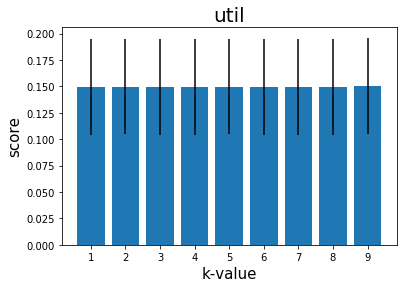

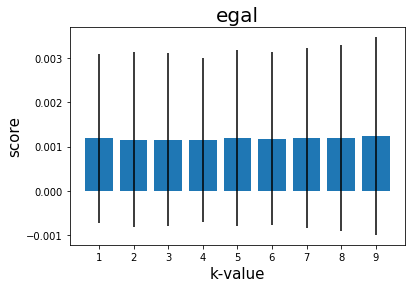

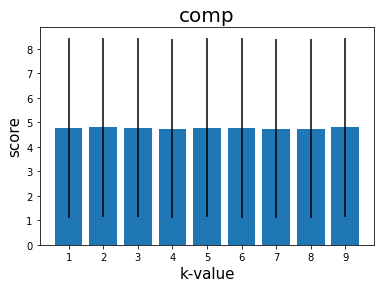

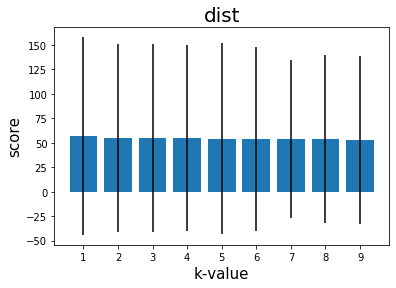

In [28]:
plot(df, "util")
plot(df, "egal")
plot(df, "comp")
plot(df, "dist")

## Plot based on P standard Deviation

In [15]:
df["Pstd"] = df[['p_0', 'p_1', 'p_2', 'p_3', 'p_4','p_5', 'p_6', 'p_7', 'p_8', 'p_9']].std(axis=1)

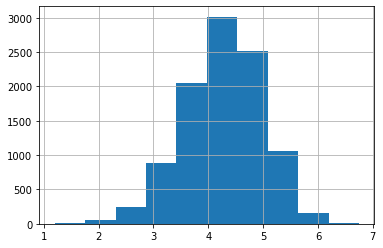

In [20]:
df["Pstd"].hist()

### High

In [51]:
high = df[df["Pstd"] > 5]

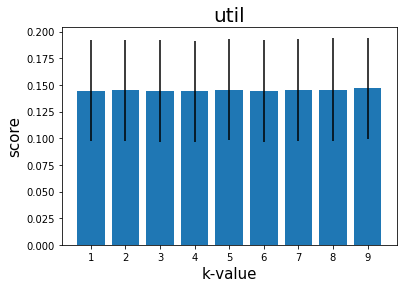

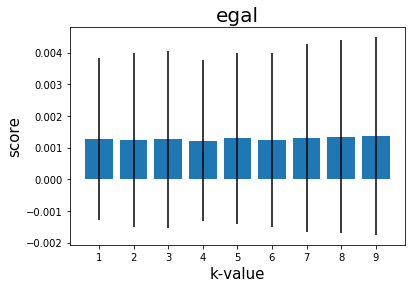

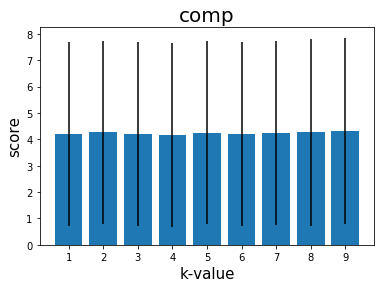

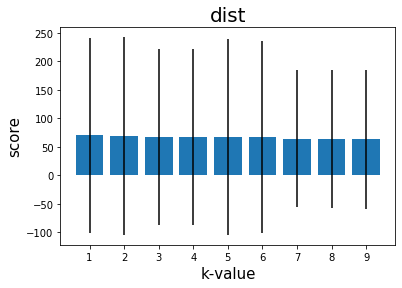

In [52]:
plot(high, "util")
plot(high, "egal")
plot(high, "comp")
plot(high, "dist")

### Middle

In [43]:
mid = df[(df["Pstd"] > 4) & (df["Pstd"] < 5)]

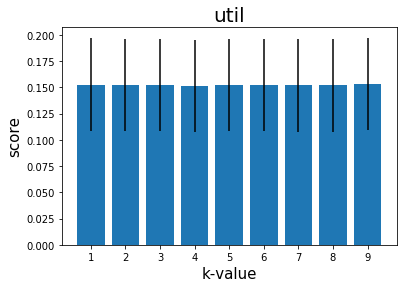

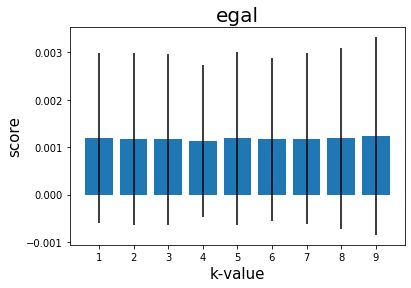

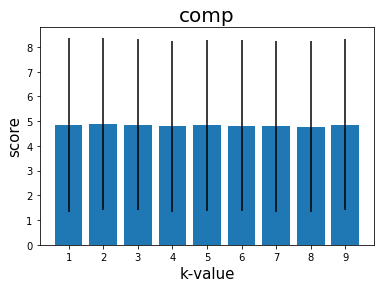

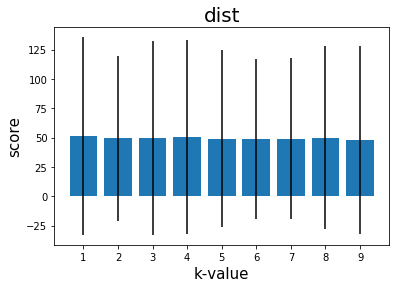

In [44]:
plot(mid, "util")
plot(mid, "egal")
plot(mid, "comp")
plot(mid, "dist")

### Low

In [32]:
low = df[df["Pstd"] < 3]

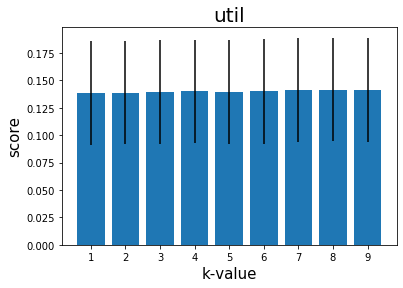

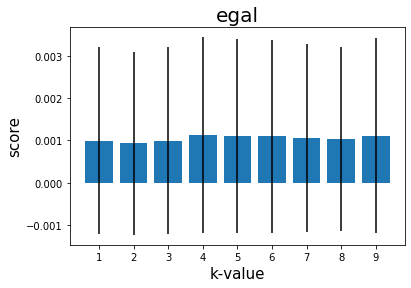

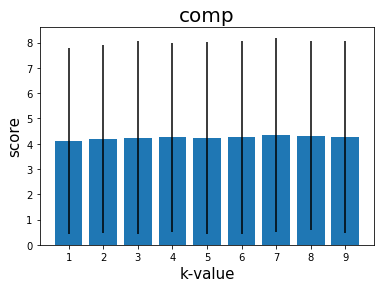

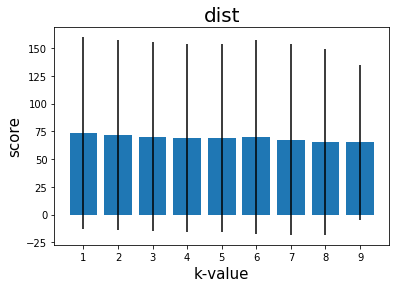

In [33]:
plot(low, "util")
plot(low, "egal")
plot(low, "comp")
plot(low, "dist")

## Plot based on U standard Deviation

In [45]:
df["Ustd"] = df[['u_0', 'u_1', 'u_2', 'u_3', 'u_4','u_5', 'u_6', 'u_7', 'u_8', 'u_9']].std(axis=1)

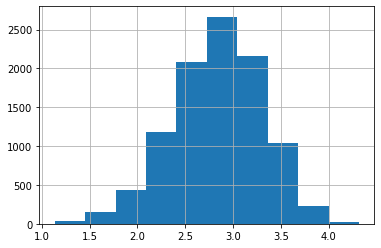

In [46]:
df["Ustd"].hist()

### High

In [53]:
high = df[df["Ustd"] > 3.5]

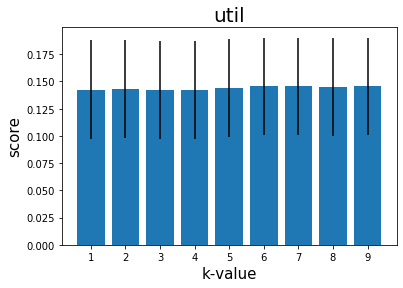

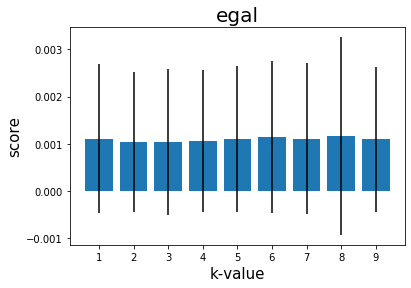

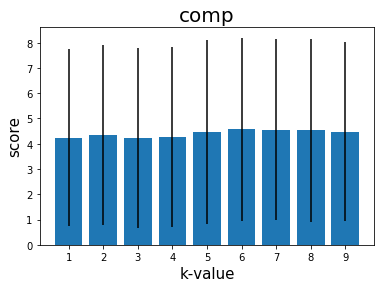

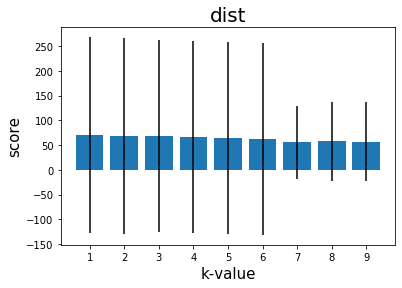

In [54]:
plot(high, "util")
plot(high, "egal")
plot(high, "comp")
plot(high, "dist")

### Middle

In [55]:
mid = df[(df["Pstd"] > 2.5) & (df["Pstd"] < 3.5)]

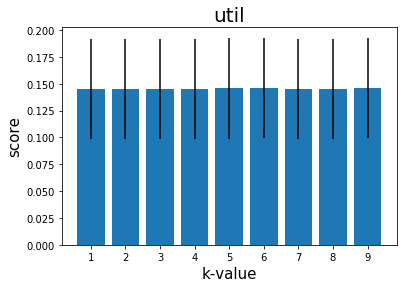

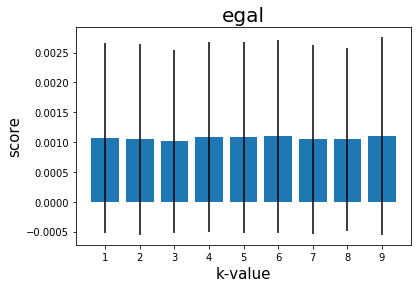

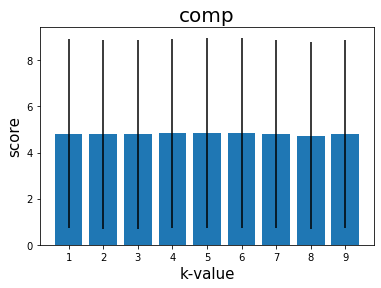

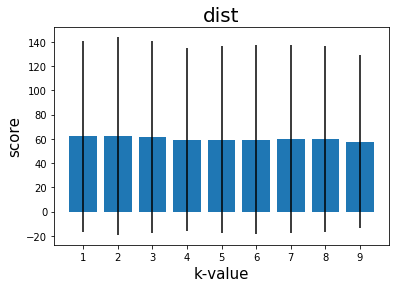

In [56]:
plot(mid, "util")
plot(mid, "egal")
plot(mid, "comp")
plot(mid, "dist")

### Low

In [47]:
low = df[df["Ustd"] < 2.5]

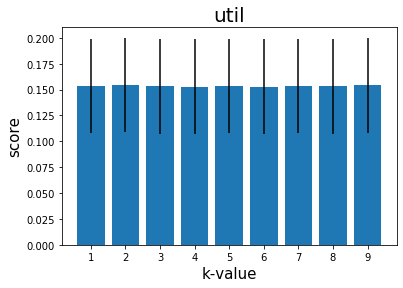

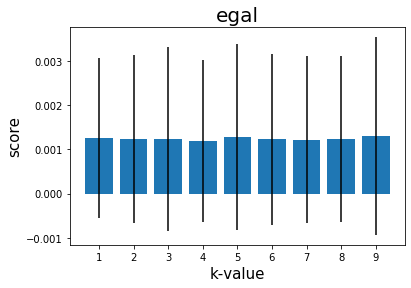

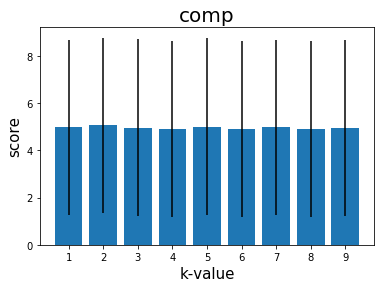

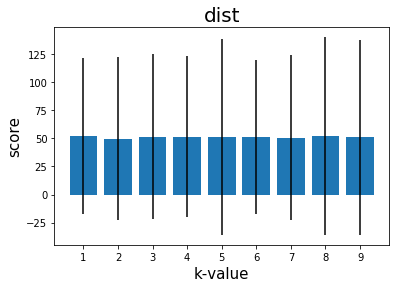

In [48]:
plot(low, "util")
plot(low, "egal")
plot(low, "comp")
plot(low, "dist")